In [3]:
from itertools import product
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

from plot_utils import *
import sys
sys.path.append("../")
from difficulty.metrics.metric_utils import combine_metrics_into_df, select_all_replicates, average_columns


def correlations_by_metric(metrics_dir, use_median, use_rank):
    df, metrics, (_, models, replicates) = combine_metrics_into_df(metrics_dir)
    metrics = order_metrics(metrics)
    models = order_models(models)
    corr_fn = spearmanr if use_rank else pearsonr
    # prepare subplots
    fig = plt.figure(figsize=(12 * len(models), 12 * 2), constrained_layout=True)
    grid = matplotlib.gridspec.GridSpec(2, len(models), figure=fig)
    for i, (model, shortname) in enumerate(models.items()):
        # plot var/cov between independent replicate pairs
        corr_array = []
        for metric_a, metric_b in product(metrics, metrics):
            df_a = select_all_replicates(df, model, metric_a)
            df_b = select_all_replicates(df, model, metric_b)
            if metric_a == metric_b:  # split same replicate into 2 disjoint subsets
                half = len(df_a.columns) // 2
                df_a = df_a.iloc[:, :half]
                df_b = df_b.iloc[:, half:(2 * half)]
            correlations = []
            for (k_a, a), (k_b, b) in zip(df_a.iteritems(), df_b.iteritems()):
                corr, p = corr_fn(a.to_numpy(), b.to_numpy())
                correlations.append(corr)
            corr_array.append(np.mean(correlations))
        corr_array = np.array(corr_array).reshape(len(metrics), len(metrics))
        ax = fig.add_subplot(grid[0, i])
        plot_heatmap_tiles(ax, corr_array, metrics, metrics, shortname)
        # plot change in cov when using averages
        avg_df = average_over_replicates(df, model, metrics, use_median=use_median)
        avg_corr = []
        for metric_a, metric_b in product(metrics, metrics):
            corr, p = corr_fn(avg_df[metric_a].to_numpy(), avg_df[metric_b].to_numpy())
            avg_corr.append(corr)
        avg_corr = np.array(avg_corr).reshape(len(metrics), len(metrics))
        corr_diff = avg_corr - corr_array
        ax = fig.add_subplot(grid[1, i])
        plot_heatmap_tiles(ax, corr_diff, metrics, metrics, shortname, plot_diagonal=False)
    fig.show()

/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/da

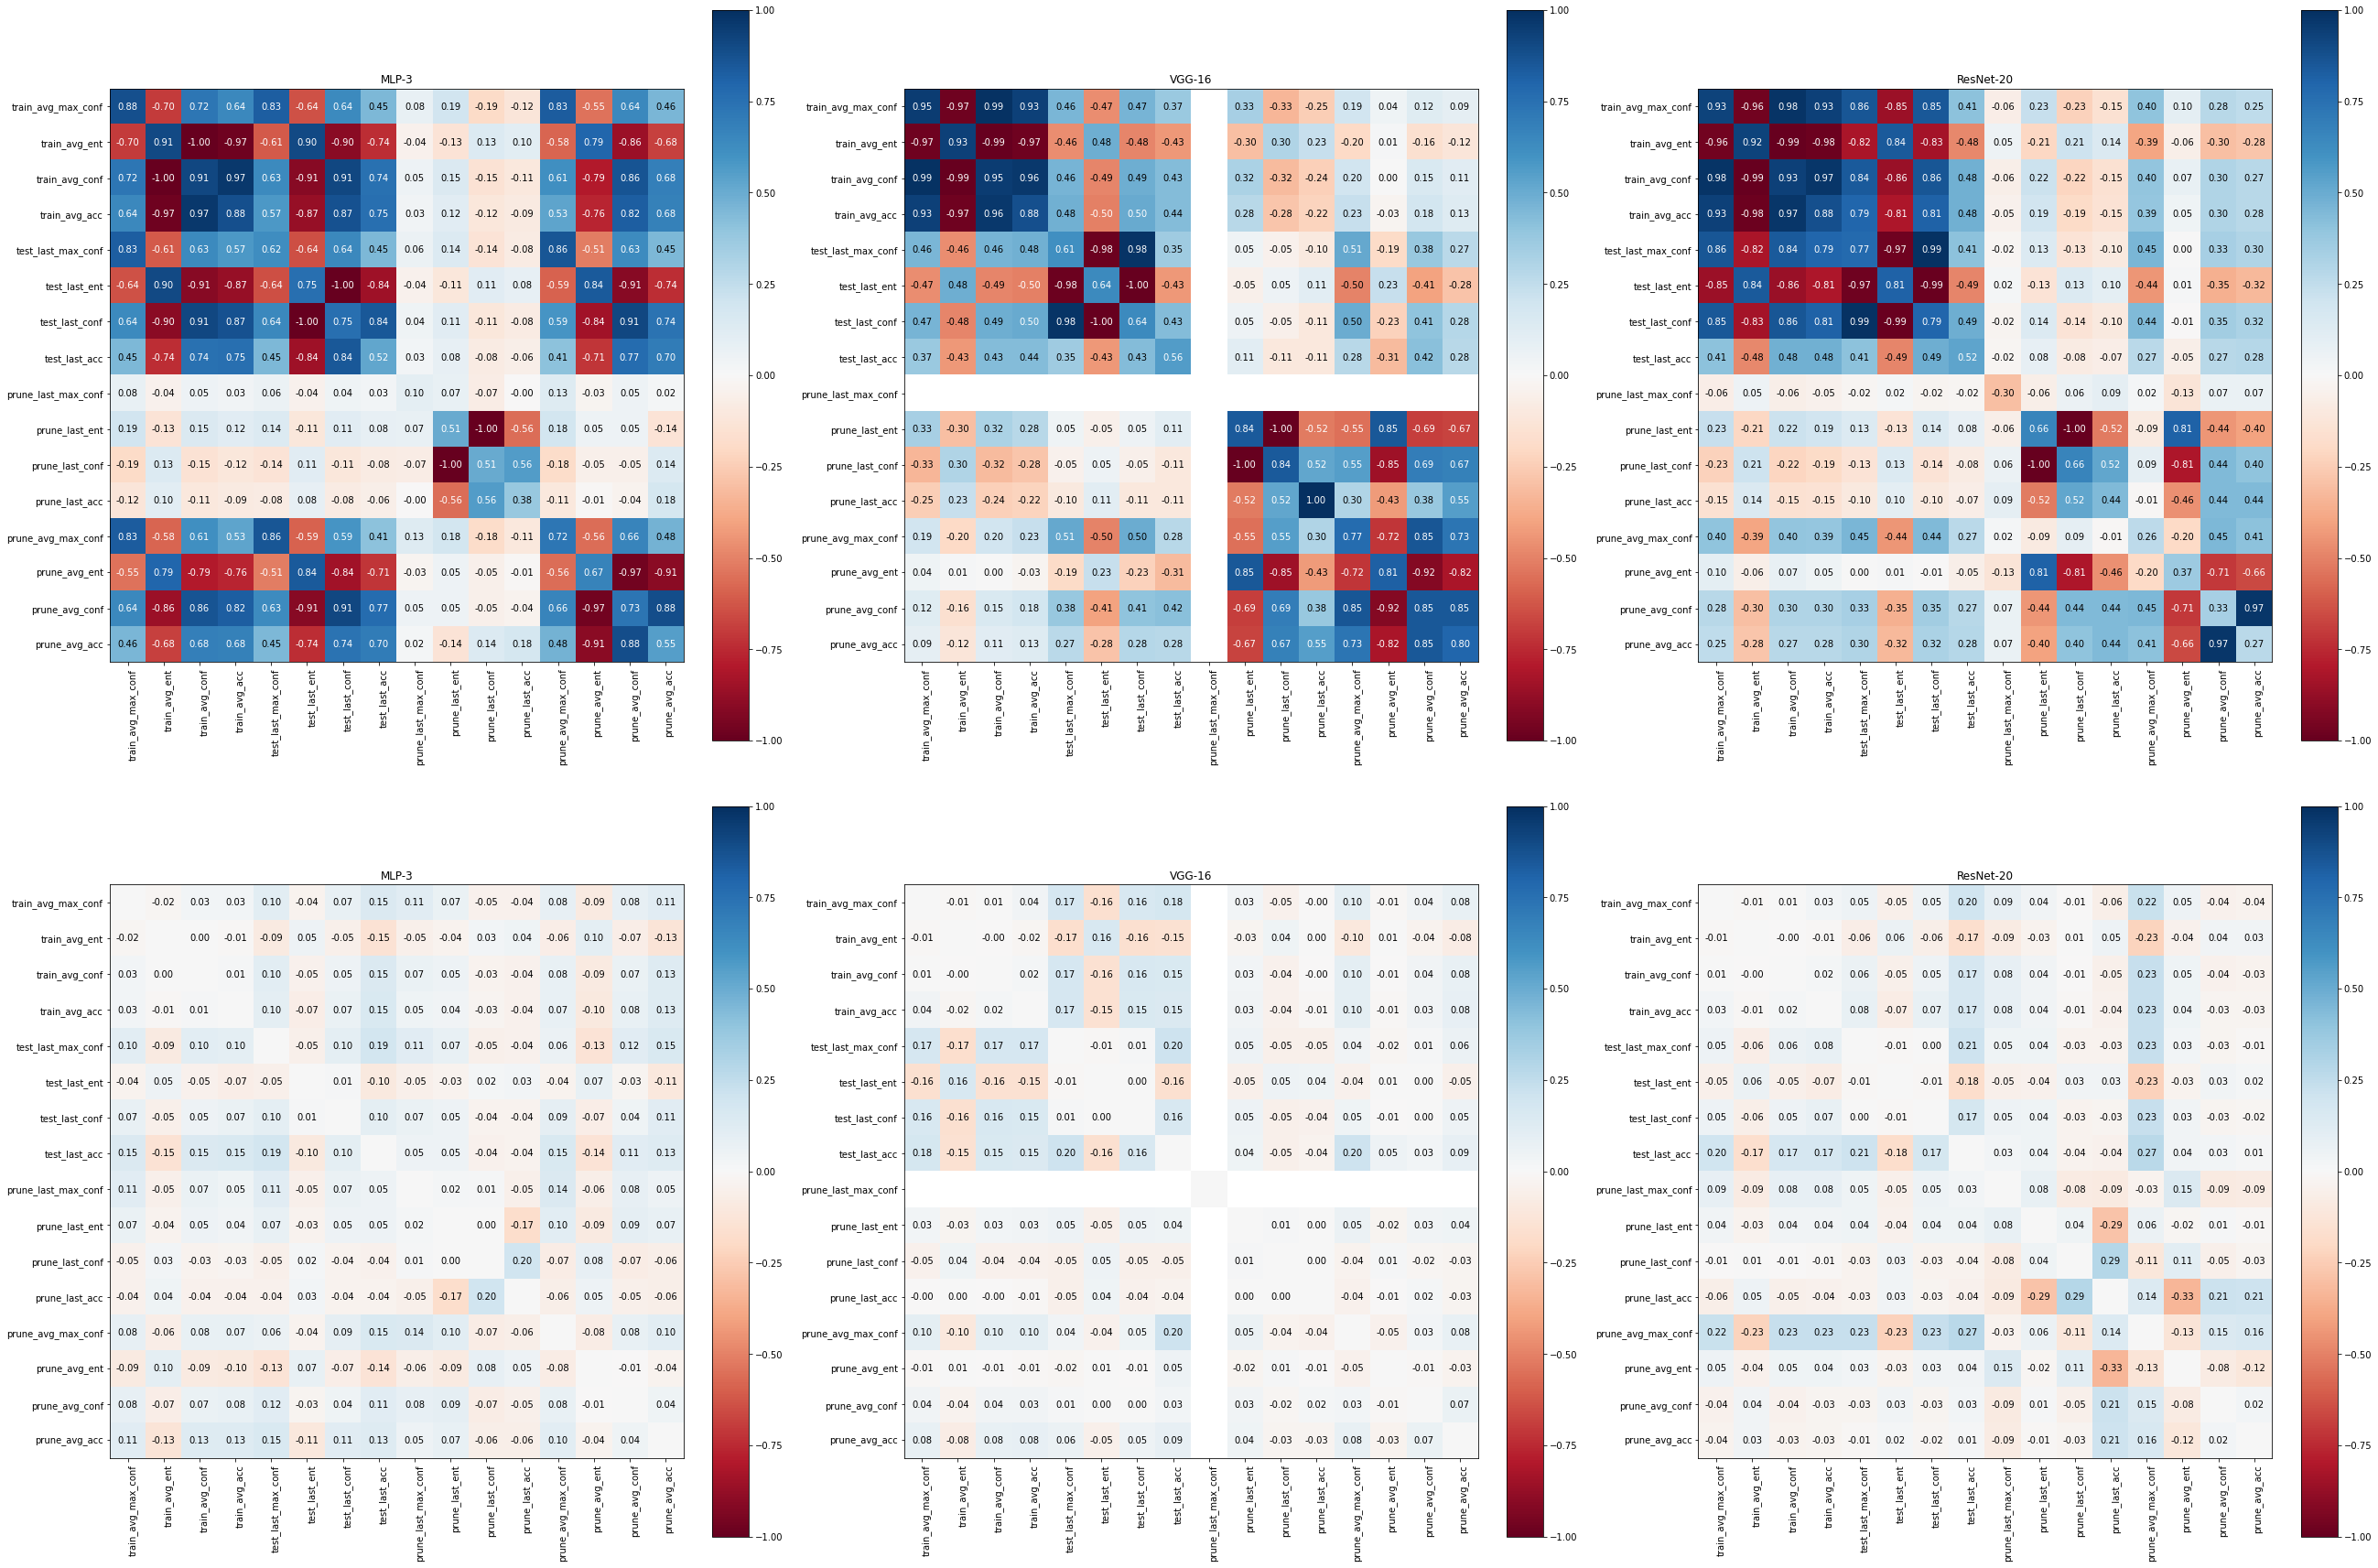

In [4]:
metrics_by_architecture = Path("../outputs")
correlations_by_metric(metrics_by_architecture, use_median=False, use_rank=True)

/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/p

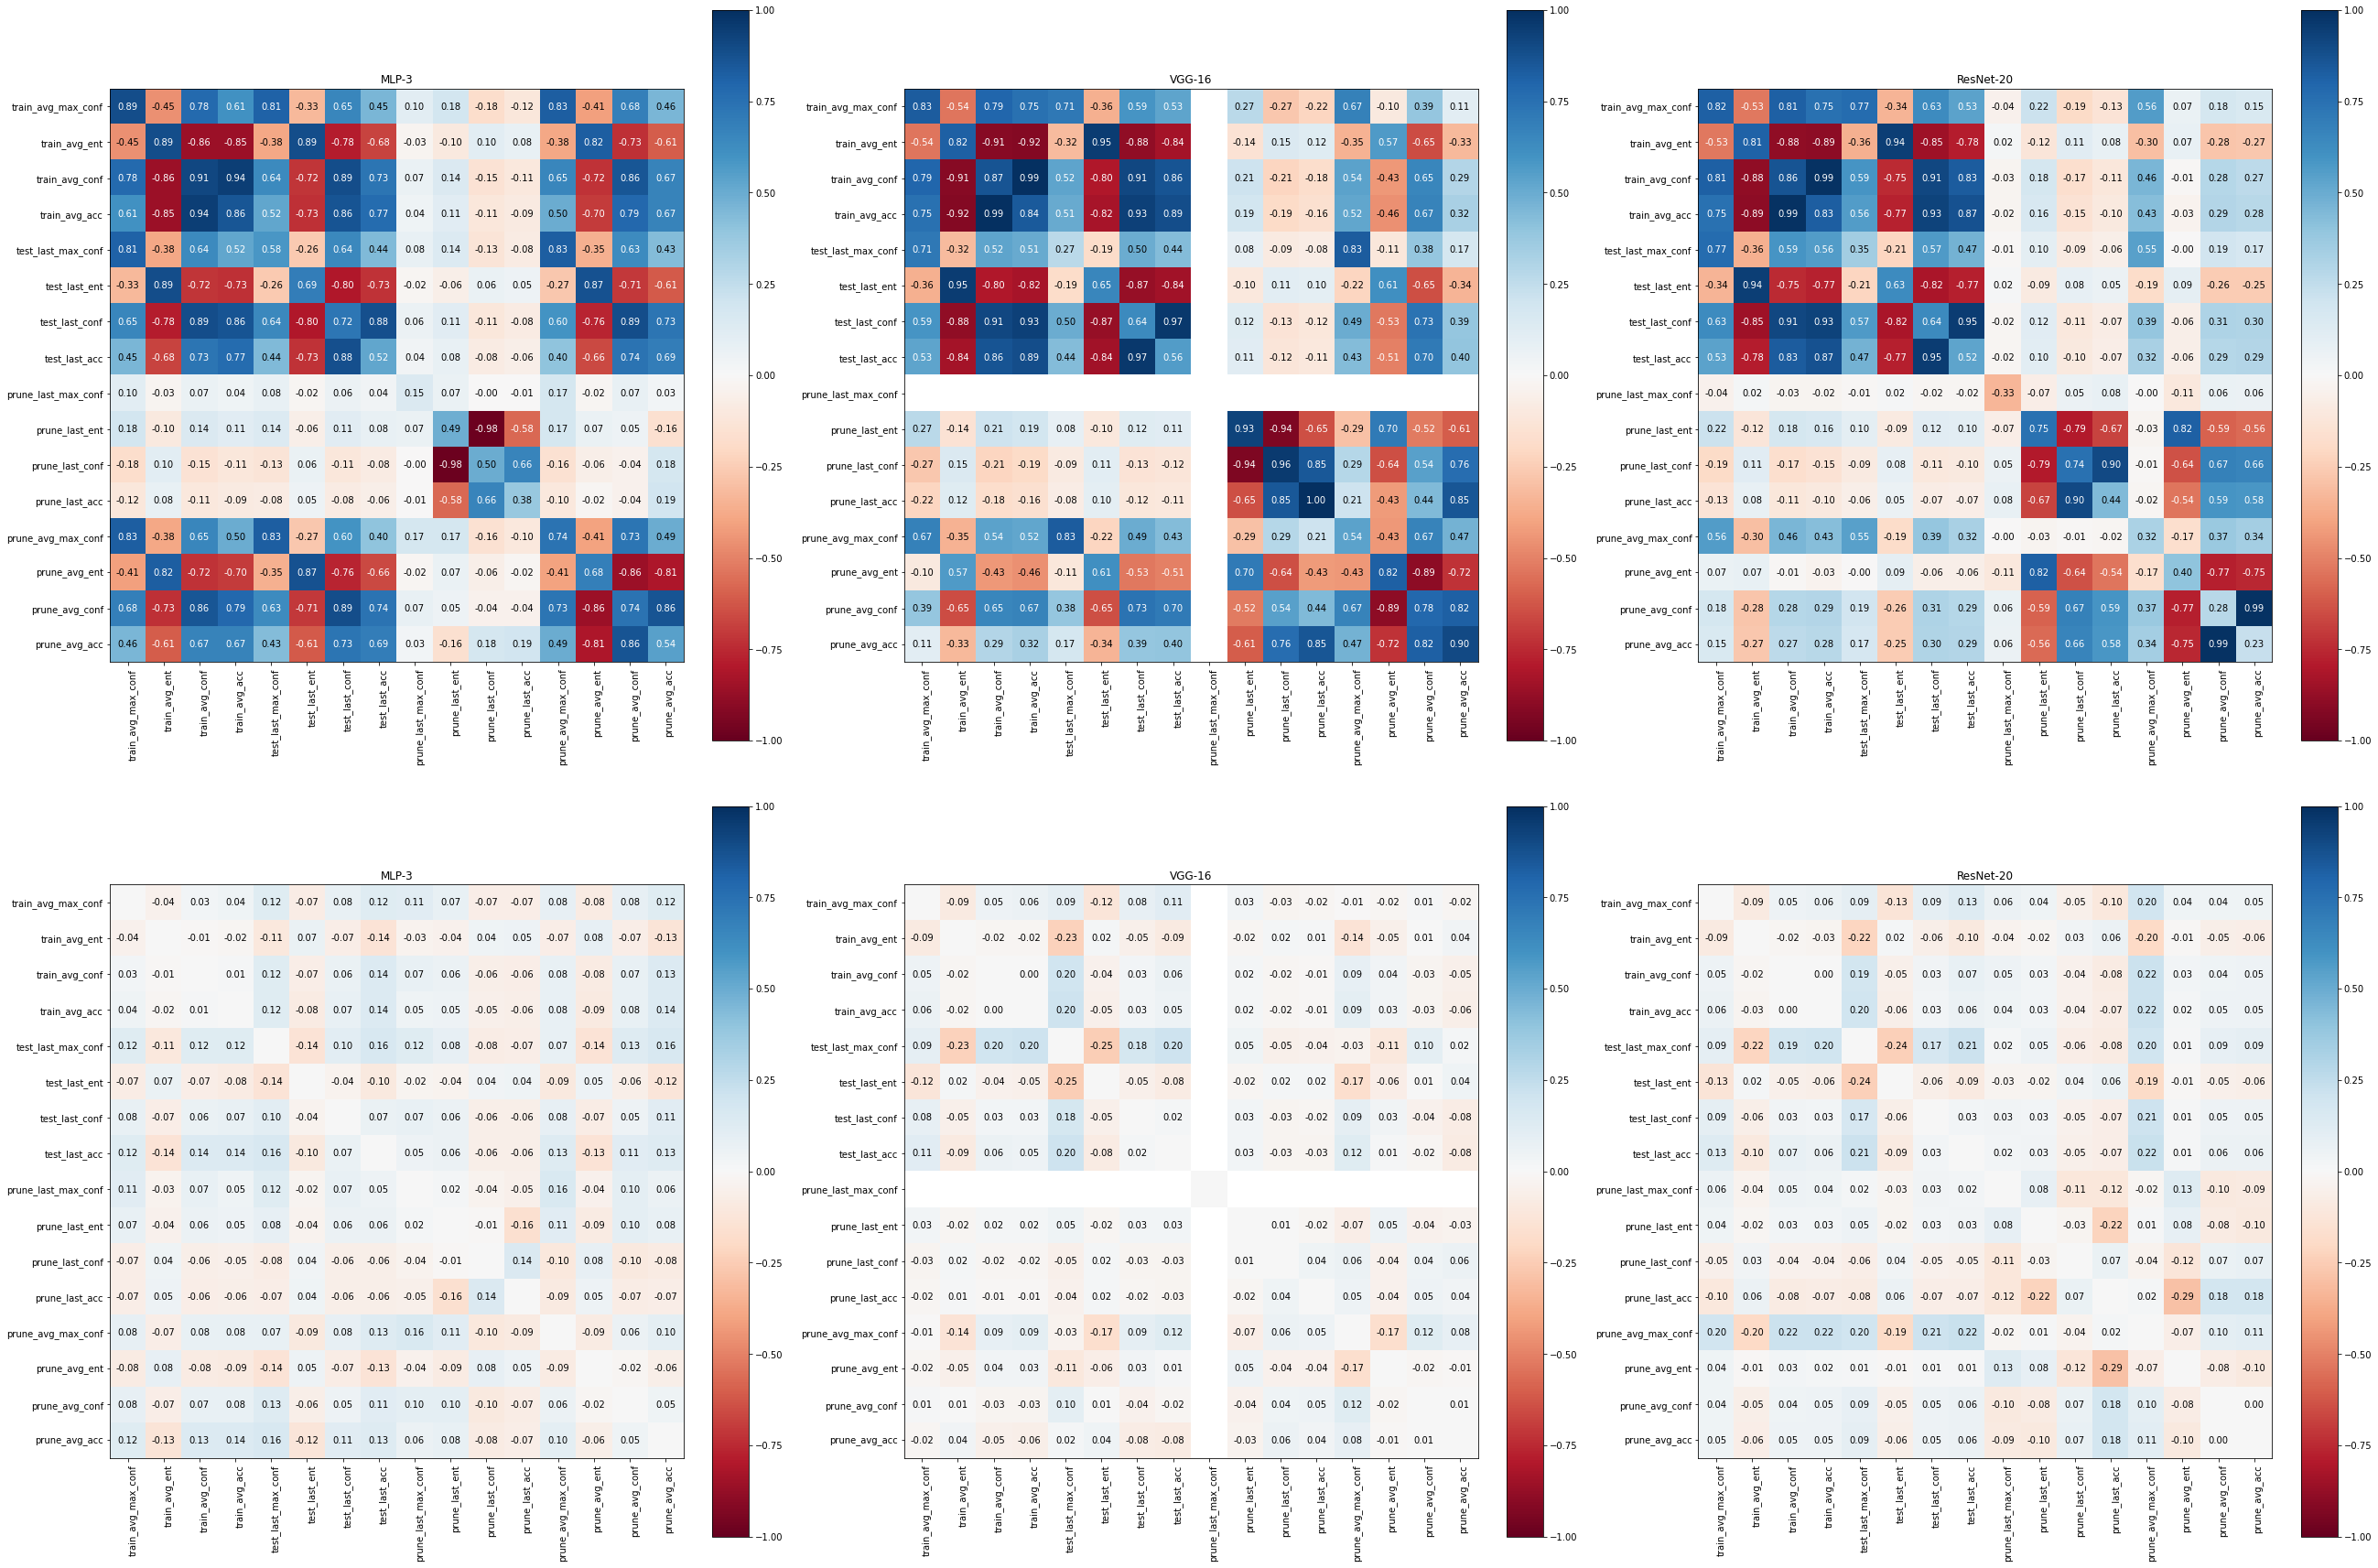

In [5]:
correlations_by_metric(metrics_by_architecture, use_median=False, use_rank=False)

/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4484: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(SpearmanRConstantInputWarning())
/home/devin/d/da

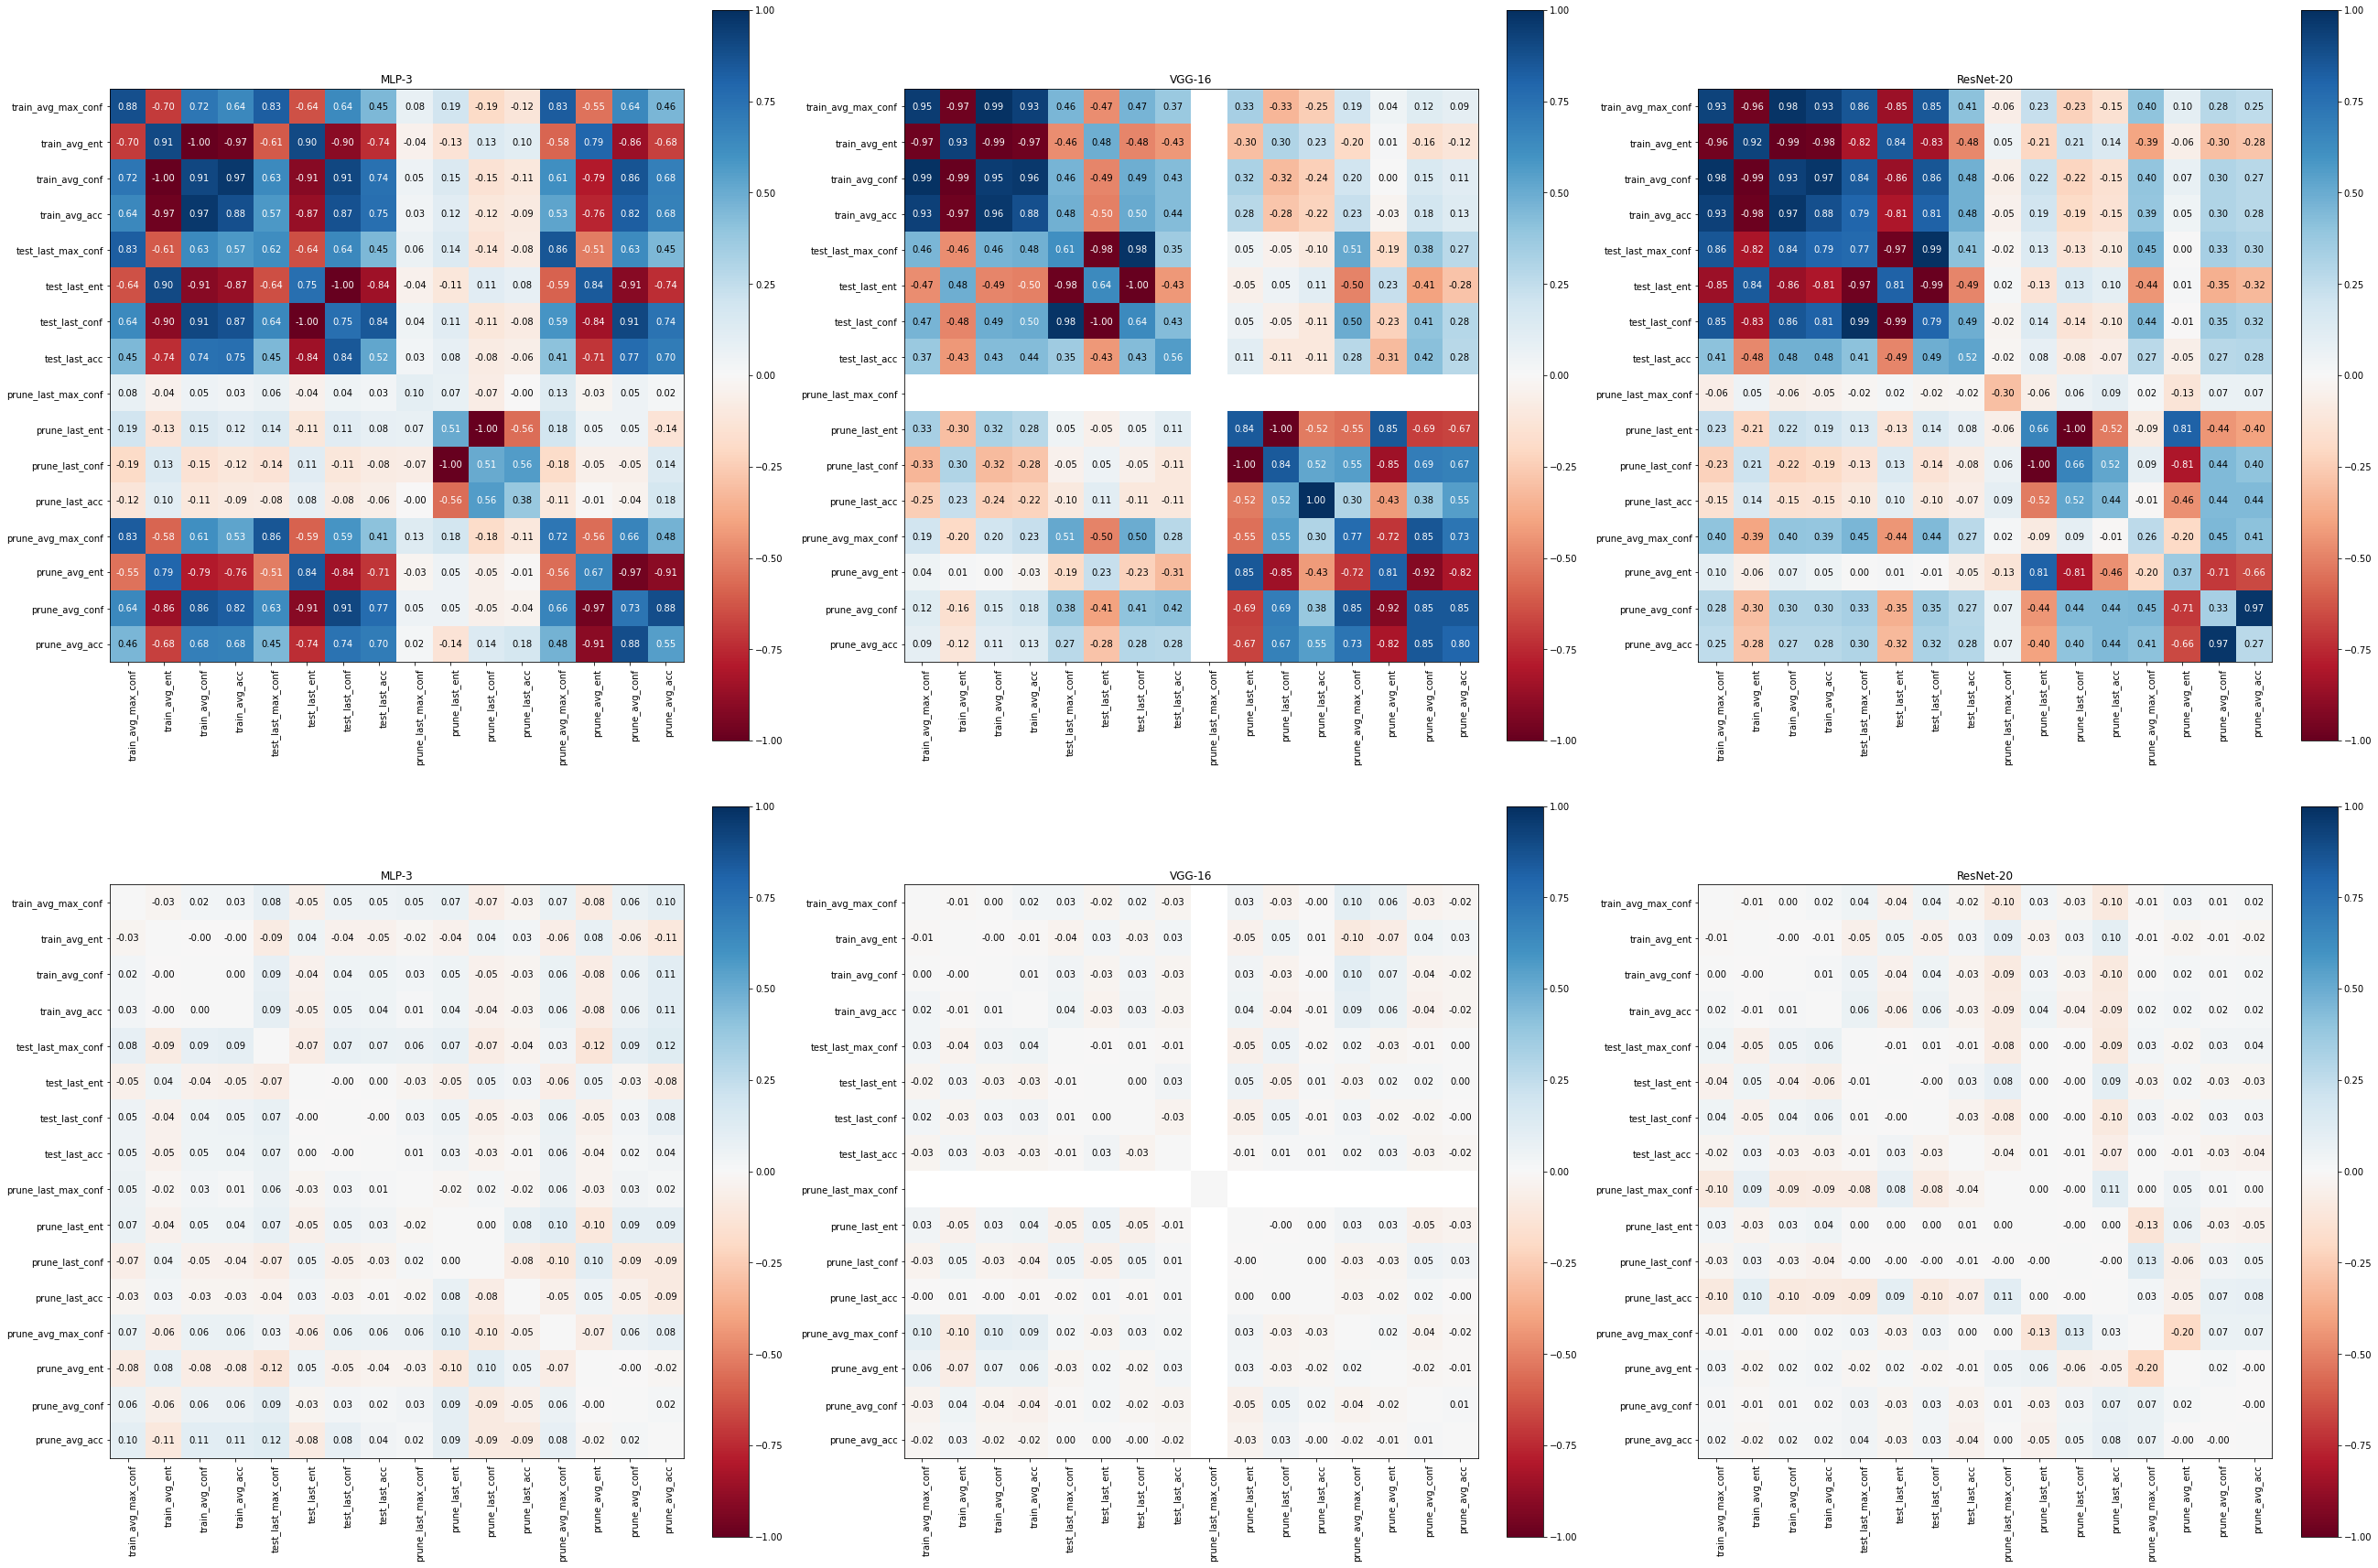

In [6]:
correlations_by_metric(metrics_by_architecture, use_median=True, use_rank=True)

/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/python/ml-torch/lib/python3.8/site-packages/scipy/stats/stats.py:4023: PearsonRConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(PearsonRConstantInputWarning())
/home/devin/d/data/src/p

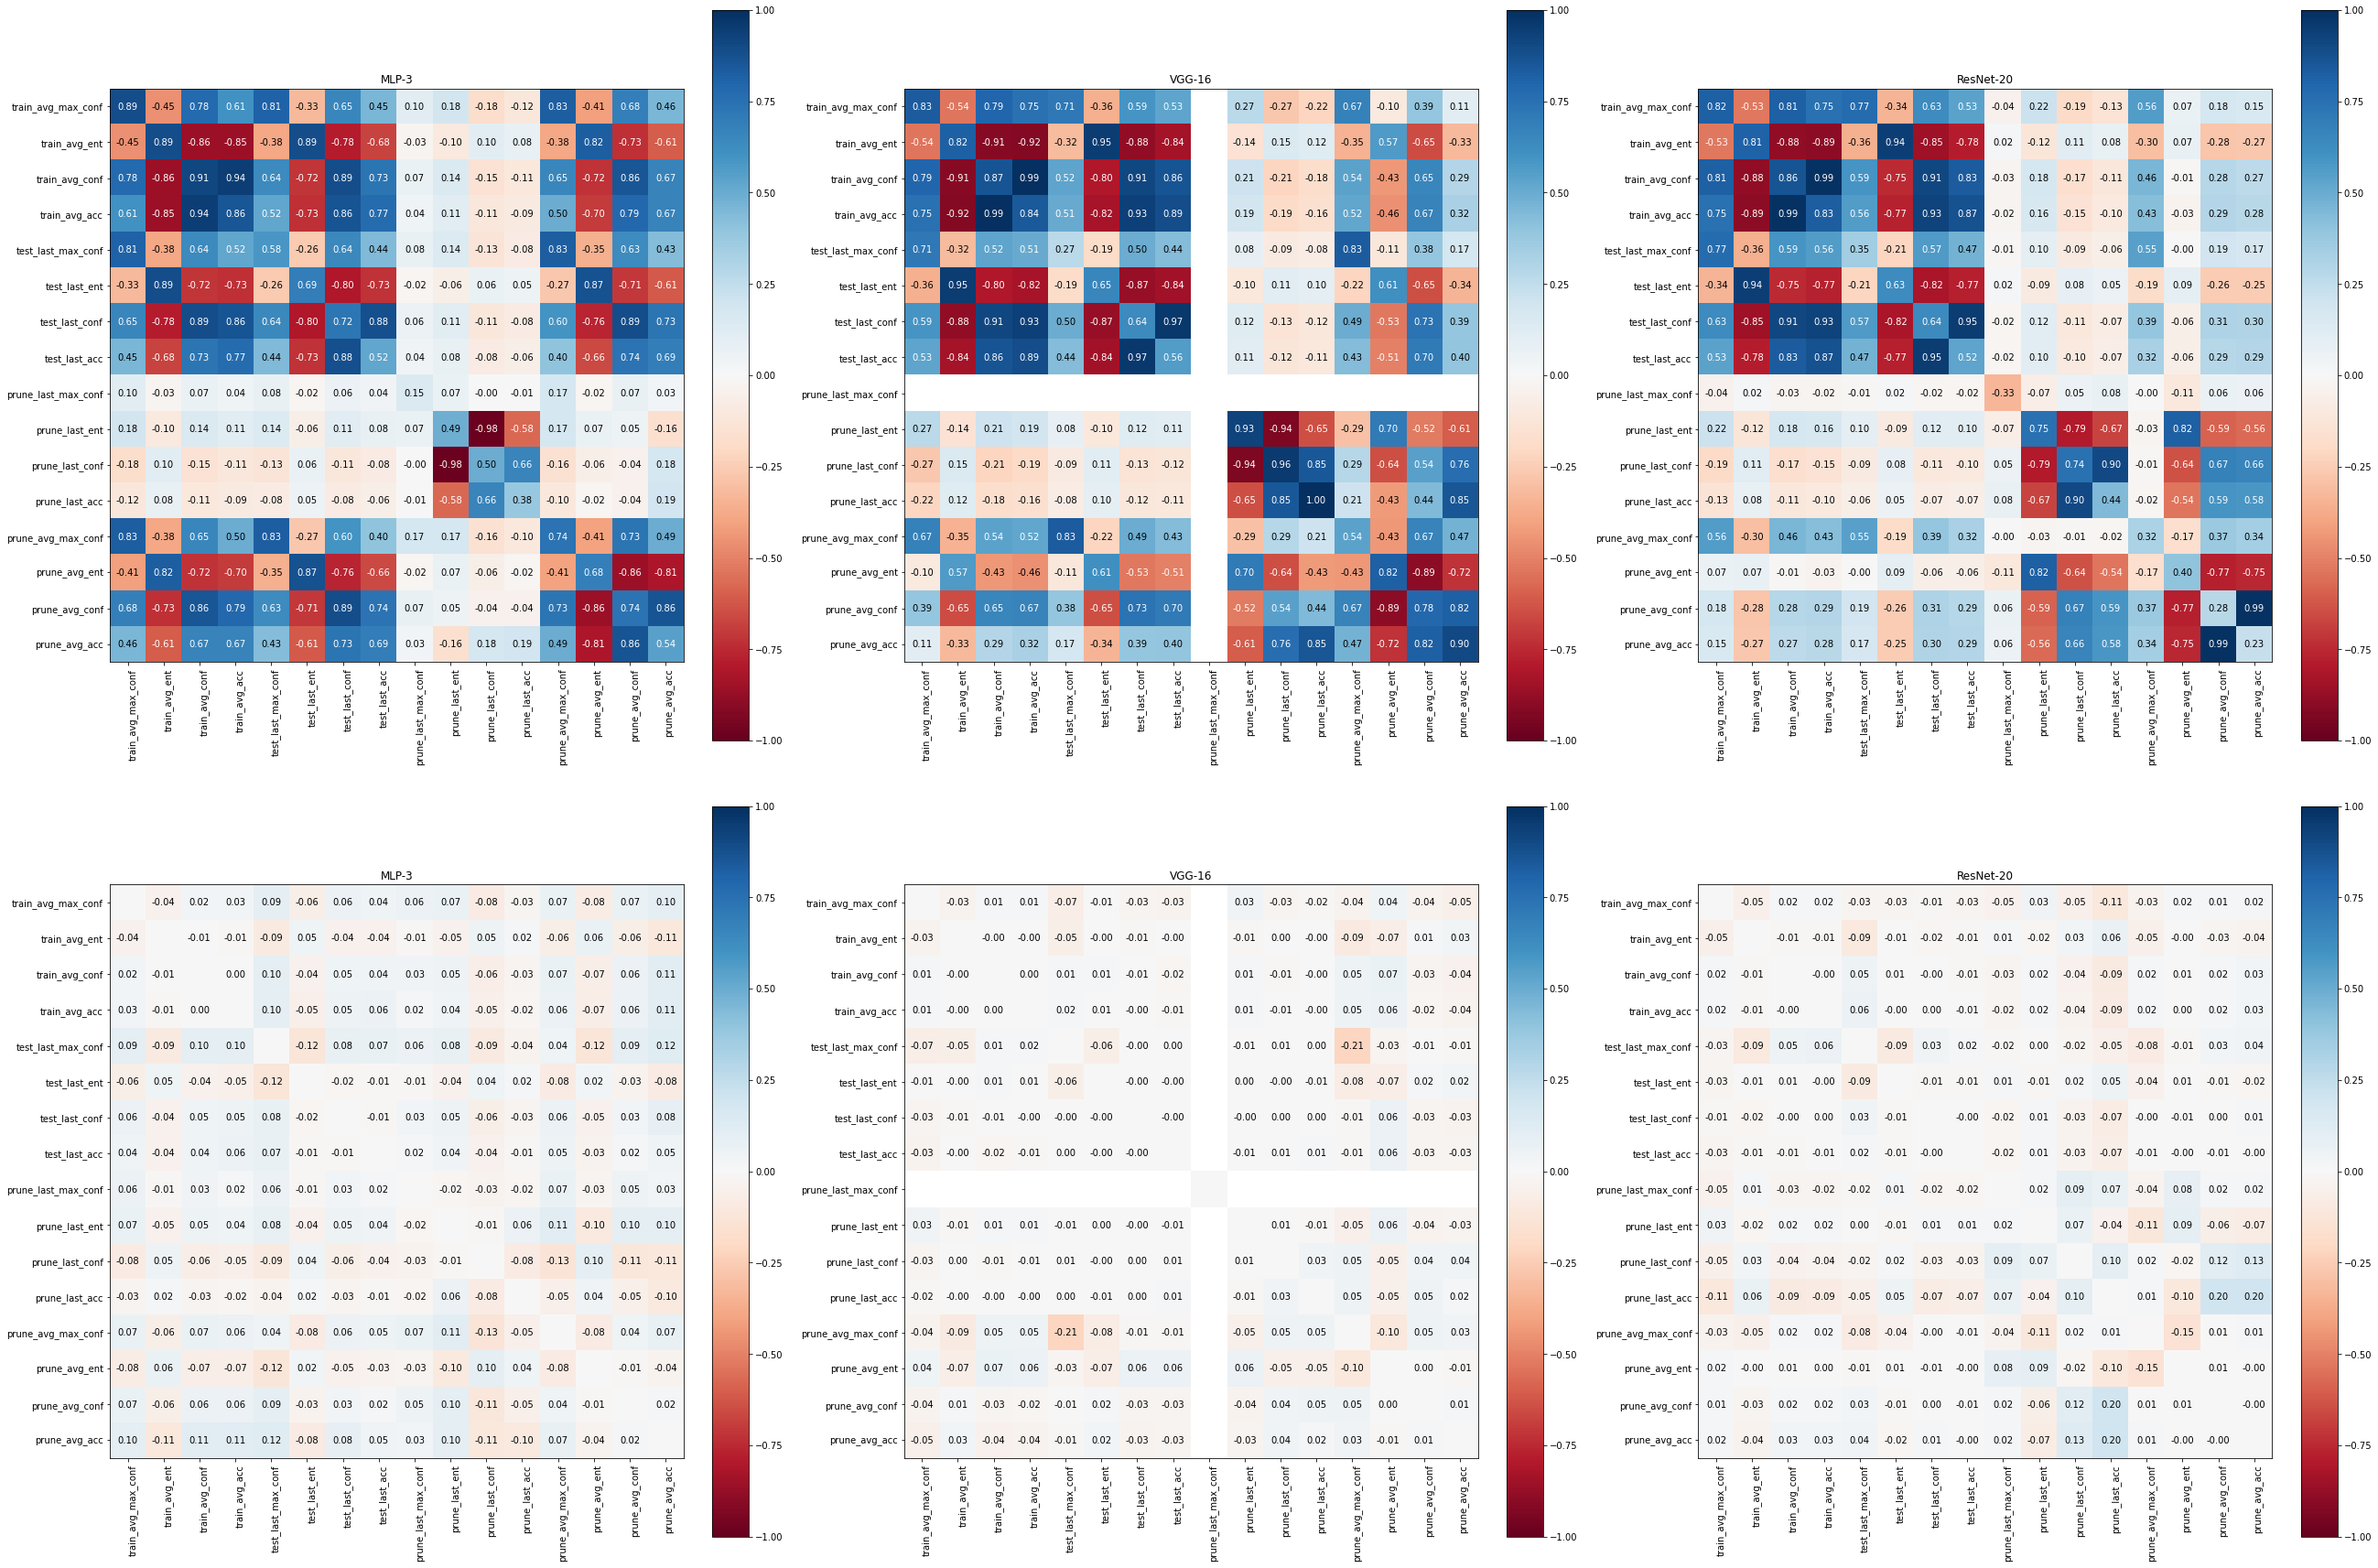

In [7]:
correlations_by_metric(metrics_by_architecture, use_median=True, use_rank=False)